In [1]:
import os
import pandas as pd
from pydantic import Field
from pydantic_settings import BaseSettings, SettingsConfigDict
# from semantic_router.encoders import OpenAIEncoder
from encoder import OpenAIEncoder

In [2]:
class Settings(BaseSettings):
    model_config = SettingsConfigDict(
        env_file=".env", env_file_encoding="utf-8", extra="ignore"
    )
    embedding_base_url: str
    embedding_api_key: str
    embedding_model: str

settings = Settings()
print(settings.embedding_model)

baai/bge-m3


In [3]:
# Use a custom OpenAIEncoder implementation to use local models
encoder = OpenAIEncoder(
    name=settings.embedding_model,
    base_url=settings.embedding_base_url,
    api_key=settings.embedding_api_key,
)

In [4]:
from semantic_chunkers import StatisticalChunker

In [5]:
# StatisticalChunker options
# https://github.com/aurelio-labs/semantic-chunkers/blob/43ee0ac6ecdf76790de7d4ac4029f59438f34769/semantic_chunkers/chunkers/statistical.py#L49
chunker = StatisticalChunker(
    encoder=encoder,
    dynamic_threshold = True,
    window_size = 5,
    min_split_tokens = 256,
    max_split_tokens = 2048,
    plot_chunks = True,
    enable_statistics = True
)

In [6]:
doc = '''    # Mamba: Linear-Time Sequence Modeling with Selective State Spaces
# Albert Gu*1 and Tri Dao*2
1Machine Learning Department, Carnegie Mellon University 2Department of Computer Science, Princeton University agu@cs.cmu.edu, tri@tridao.me
# Abstract
Foundation models, now powering most of the exciting applications in deep learning, are almost universally based on the Transformer architecture and its core attention module. Many subquadratic-time architectures such as linear attention, gated convolution and recurrent models, and structured state space models (SSMs) have been developed to address Transformers' computational inefficiency on long sequences, but they have not performed as well as attention on important modalities such as language. We identify that a key weakness of such models is their inability to perform content-based reasoning, and make several improvements. First, simply letting the SSM parameters be functions of the input addresses their weakness with discrete modalities'''

  0%|          | 0/1 [00:00<?, ?it/s]

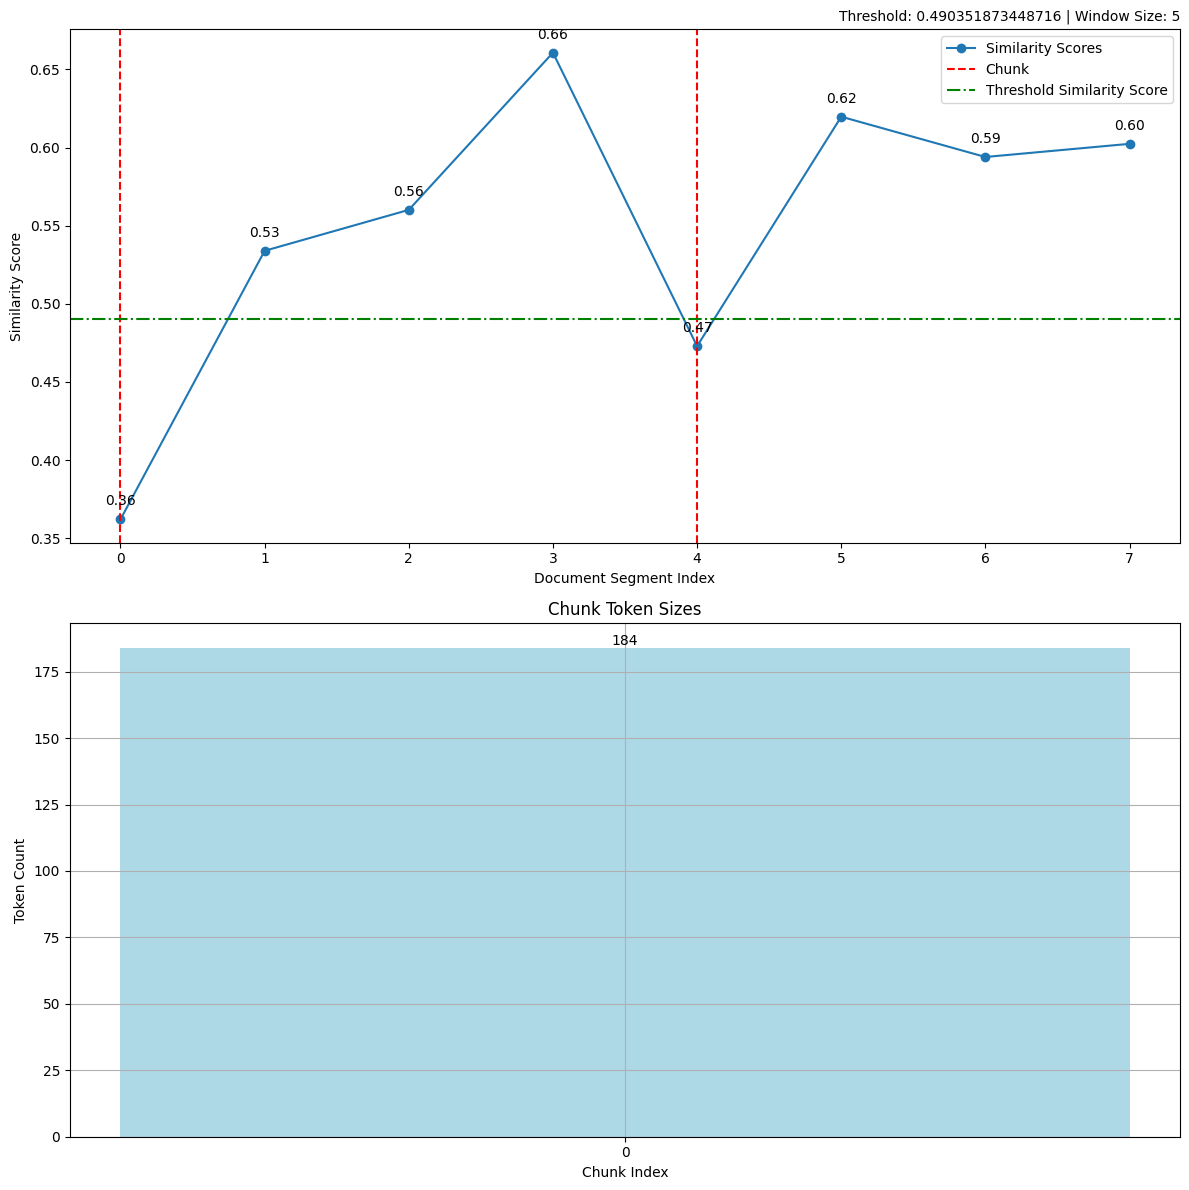

Chunking Statistics:
  - Total Documents: 9
  - Total Chunks: 1
  - Chunks by Threshold: 0
  - Chunks by Max Chunk Size: 0
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 184
  - Maximum Token Size of Chunk: 184
  - Similarity Chunk Ratio: 0.00


In [7]:
chunks = chunker(docs=[doc])

In [8]:
chunks[0][0].splits

['# Mamba:',
 'Linear-Time Sequence Modeling with Selective State Spaces',
 '# Albert Gu*1 and Tri Dao*2',
 '1Machine Learning Department, Carnegie Mellon University 2Department of Computer Science, Princeton University agu@cs.cmu.edu, tri@tridao.me',
 '# Abstract',
 'Foundation models, now powering most of the exciting applications in deep learning, are almost universally based on the Transformer architecture and its core attention module.',
 "Many subquadratic-time architectures such as linear attention, gated convolution and recurrent models, and structured state space models (SSMs) have been developed to address Transformers' computational inefficiency on long sequences, but they have not performed as well as attention on important modalities such as language.",
 'We identify that a key weakness of such models is their inability to perform content-based reasoning, and make several improvements.',
 'First, simply letting the SSM parameters be functions of the input addresses their w